In [3]:
# importing necessary libraries
import tensorflow
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras import backend as K

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()   # loading the data
print(x_train.shape, x_test.shape)

11493376/11490434 [==============================] - 79s 7us/step
(60000, 28, 28) (10000, 28, 28)


In [5]:
# Reshaping the train data from (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# Reshaping the test data from (10000,28,28) to (10000,28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Text(0.5, 1.0, '6')

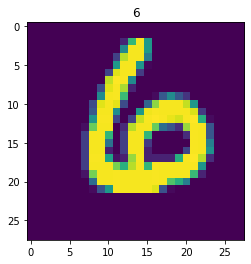

In [9]:
num = 34543
plt.imshow(x_train[num].squeeze())
plt.title(y_train[num])

In [10]:
y_train = keras.utils.to_categorical(y_train, num_classes = 10)
y_test = keras.utils.to_categorical(y_test, num_classes= 10)

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [12]:
# Normalization
x_train /= 255.0
x_test /= 255.0

In [13]:
print('x_train samples:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train samples: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [14]:
# Defining a model as Sequential
model = Sequential()
# First Convolutional layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
# Second Convolutional layer
model.add(Conv2D(64, (3,3), activation='relu'))
# First Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# First Dropout layer
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# Second Dropout layer
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, batch_size=32, epochs = 5, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 285s 5ms/step - loss: 0.1209 - accuracy: 0.9635 - val_loss: 0.0406 - val_accuracy: 0.9856
Epoch 2/5
60000/60000 [==============================] - 296s 5ms/step - loss: 0.0600 - accuracy: 0.9815 - val_loss: 0.0317 - val_accuracy: 0.9891
Epoch 3/5
60000/60000 [==============================] - 306s 5ms/step - loss: 0.0442 - accuracy: 0.9861 - val_loss: 0.0306 - val_accuracy: 0.9904
Epoch 4/5
60000/60000 [==============================] - 306s 5ms/step - loss: 0.0370 - accuracy: 0.9882 - val_loss: 0.0335 - val_accuracy: 0.9892
Epoch 5/5
60000/60000 [==============================] - 300s 5ms/step - loss: 0.0314 - accuracy: 0.9898 - val_loss: 0.0313 - val_accuracy: 0.9899


In [18]:
  model.save('mnist.h5')

In [19]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

10000/10000 [==============================] - 5s 547us/step
Test Loss: 0.03129396367880399
Test Accuracy: 0.9898999929428101
